In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'

### Continuing with our housing dataset, our predictors and outcome are as follows

Load the dataset

In [3]:
housedata = pd.read_csv('C:\\Users\\Araba\\Desktop\\blossom1\\housedata\\data.csv')
housedata.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
housedata.shape

(4600, 18)

In [6]:
housedata.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [7]:
housedata['price_log'] = np.log(housedata['price'])
housedata.head()

C:\Users\Araba\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_log
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,12.653958
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,14.684290
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,12.742566
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,12.948010
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,13.217674


### First of all, we'll need to split our dataset into a training and test sets.
* This will enable us validate the performance of our model

In [8]:
y = housedata['price'].copy()
X = housedata[['sqft_living', 'sqft_above']].copy()

In [10]:
train_size = int(housedata.shape[0] * 0.8); test_size = int(housedata.shape[0] * 0.2);

X_train = X.head(train_size)
y_train = y.head(train_size)

X_test = X.tail(test_size)
y_test = y.tail(test_size)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
model = lr.fit(X_train, y_train)

In [14]:
# model.predict(X_test): given a trained model, predicts the label X_test of a new set of data 
#   in this case y_pred.

y_pred = model.predict(X_test)
y_pred[:10]

array([977831.36330523, 490350.73809063, 716682.40276707, 371351.13471028,
       857241.67467905, 506871.67820303, 265978.50593811, 574538.29962576,
       872271.43388577, 496789.62410014])

In [15]:
y_test[:10].values

array([ 500000.,  570000., 1309500.,  544000.,  439000.,  530000.,
        427500.,  337000., 1095000.,  435000.])

In [16]:
# model.score(X,Y) internally calculates y_pred = model.predict(X) 
#   and then compares y_pred against Y to give an accuracy measure. 
#   Scores are between 0 and 1, with a larger score indicating a better fit.

model.score(X_test, y_test)

0.017929143037404116

In [17]:
model.score(X_train, y_train)

0.51131487445195

### Using scikit-learn to split the data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)


In [20]:
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
model.score(X_test, y_test)

0.48315233262849283

In [22]:
model.score(X_train, y_train)

0.1474997418203854

In [23]:
model.intercept_

45918.954630903376

In [24]:
model.coef_

array([251.6560841 , -17.73510687])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=801)
#X = sm.add_constant(X)
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.03565747294163191

In [26]:
model.score(X_train, y_train)

0.45673759135941283

### Using statsmodels to estimate the model

In [27]:
# formula: target ~ feature1 + feature2 + ... + featuren
train = housedata.head(train_size)
model = smf.ols('price ~ sqft_living + sqft_above', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     1924.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        06:23:00   Log-Likelihood:                -51043.
No. Observations:                3680   AIC:                         1.021e+05
Df Residuals:                    3677   BIC:                         1.021e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.905e+04   1.04e+04     -2.785      0.005   -4.95e+04   -8599.349
sqft_living   289.3309      9.096     31.807      0.000     271.496     307.166
sqft_above    -18.6644     10.264     -1.818      0.069     -38.788       1.459
==============================================================================
Omnibus:                     2779.642   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169274.429
Skew:                           3.037   Prob(JB):                         0.00
Kurtosis:                      35.666   Cond. No.                     7.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

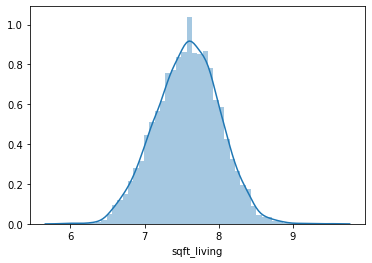

In [29]:
sns.distplot(np.log(housedata['sqft_living']))

In [30]:
model2 = sm.OLS(y_train, X_train).fit();
pred4 = model2.predict(X_test)


In [31]:
#y = 278.6753*sqft_living - 26.5423*sqft_above

In [32]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              8673.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):                        0.00
Time:                        06:26:02   Log-Likelihood:                         -51321.
No. Observations:                3680   AIC:                                  1.026e+05
Df Residuals:                    3678   BIC:                                  1.027e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   278.6753      9.388     29.685      0.000     260.270     297.081
sqft_above    -26.5423     10.872     -2.441      0.015     -47.858      -5.226
==============================================================================
Omnibus:                     2568.816   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137678.204
Skew:                           2.718   Prob(JB):                         0.00
Kurtosis:                      32.468   Cond. No.                         9.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""